In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline 

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *

# Precision-Recall Utilities

In [6]:
def findPrecRec(path, directory, directory_weights, exist = True):
    filename_list = listFiles(path, directory)
    weights = {}
    for filename in filename_list:
        map_value = take_PrecRec_TrecEval(path, directory, directory_weights, filename, exist)
        weights[filename] = map_value
    return weights

def take_PrecRec_TrecEval(path, directory, directory_precRec, filename, exist = False):
    if(not exist):
        process = "{}trec_eval {} {}"
        path_to_bin = path+"\\terrier-core-4.2\\bin\\"
        path_to_pool = path+"\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"
        path_to_run = path + "\\" + directory + "\\" + str(filename)
        process = str(process.format(path_to_bin, path_to_pool, path_to_run))
        p = subprocess.check_output(process, shell=True)

        text_file = open(path + "\\" + directory_precRec + "\\" + "w_" + filename, "w")
        text_file.write(p)
        text_file.close()
        
    text_file = open(path + "\\" + directory_precRec + "\\" + "w_" + filename, "r")
    p = text_file.read()
     
    lines = p.split("\n")
    prec_rec = []
    for i in range(0, 11):
        prec_rec.append(float(lines[11 + i].split()[2]))
    return prec_rec

def plot_PrecRec(prec_rec, rf_list):
    x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    y = {}
    
    for cl in rf_list:
        y[cl] = list()
    for cl in rf_list:
        y[cl].append(prec_rec[cl])
      
    colors = ["r","g", "b", "c", "k", "y"]
    #plt.rcParams["figure.figsize"] = [12, 8] 
    plt.figure(figsize=(12, 8), dpi=300)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Recall-Precision')
    for i in range(len(rf_list)):
        plt.plot(x, y[rf_list[i]][0], colors[i] + "--")
    plt.legend([s.replace(".txt","") for s in rf_list])
    plt.show()

# Follow Precision-Recall curves for all the Rank Fusion approaches

In [15]:
path = os.getcwd()
dir_comb = "comb" 
dir_pr = "prec_rec"  
pr = findPrecRec(path, dir_comb, dir_pr, exist=False)

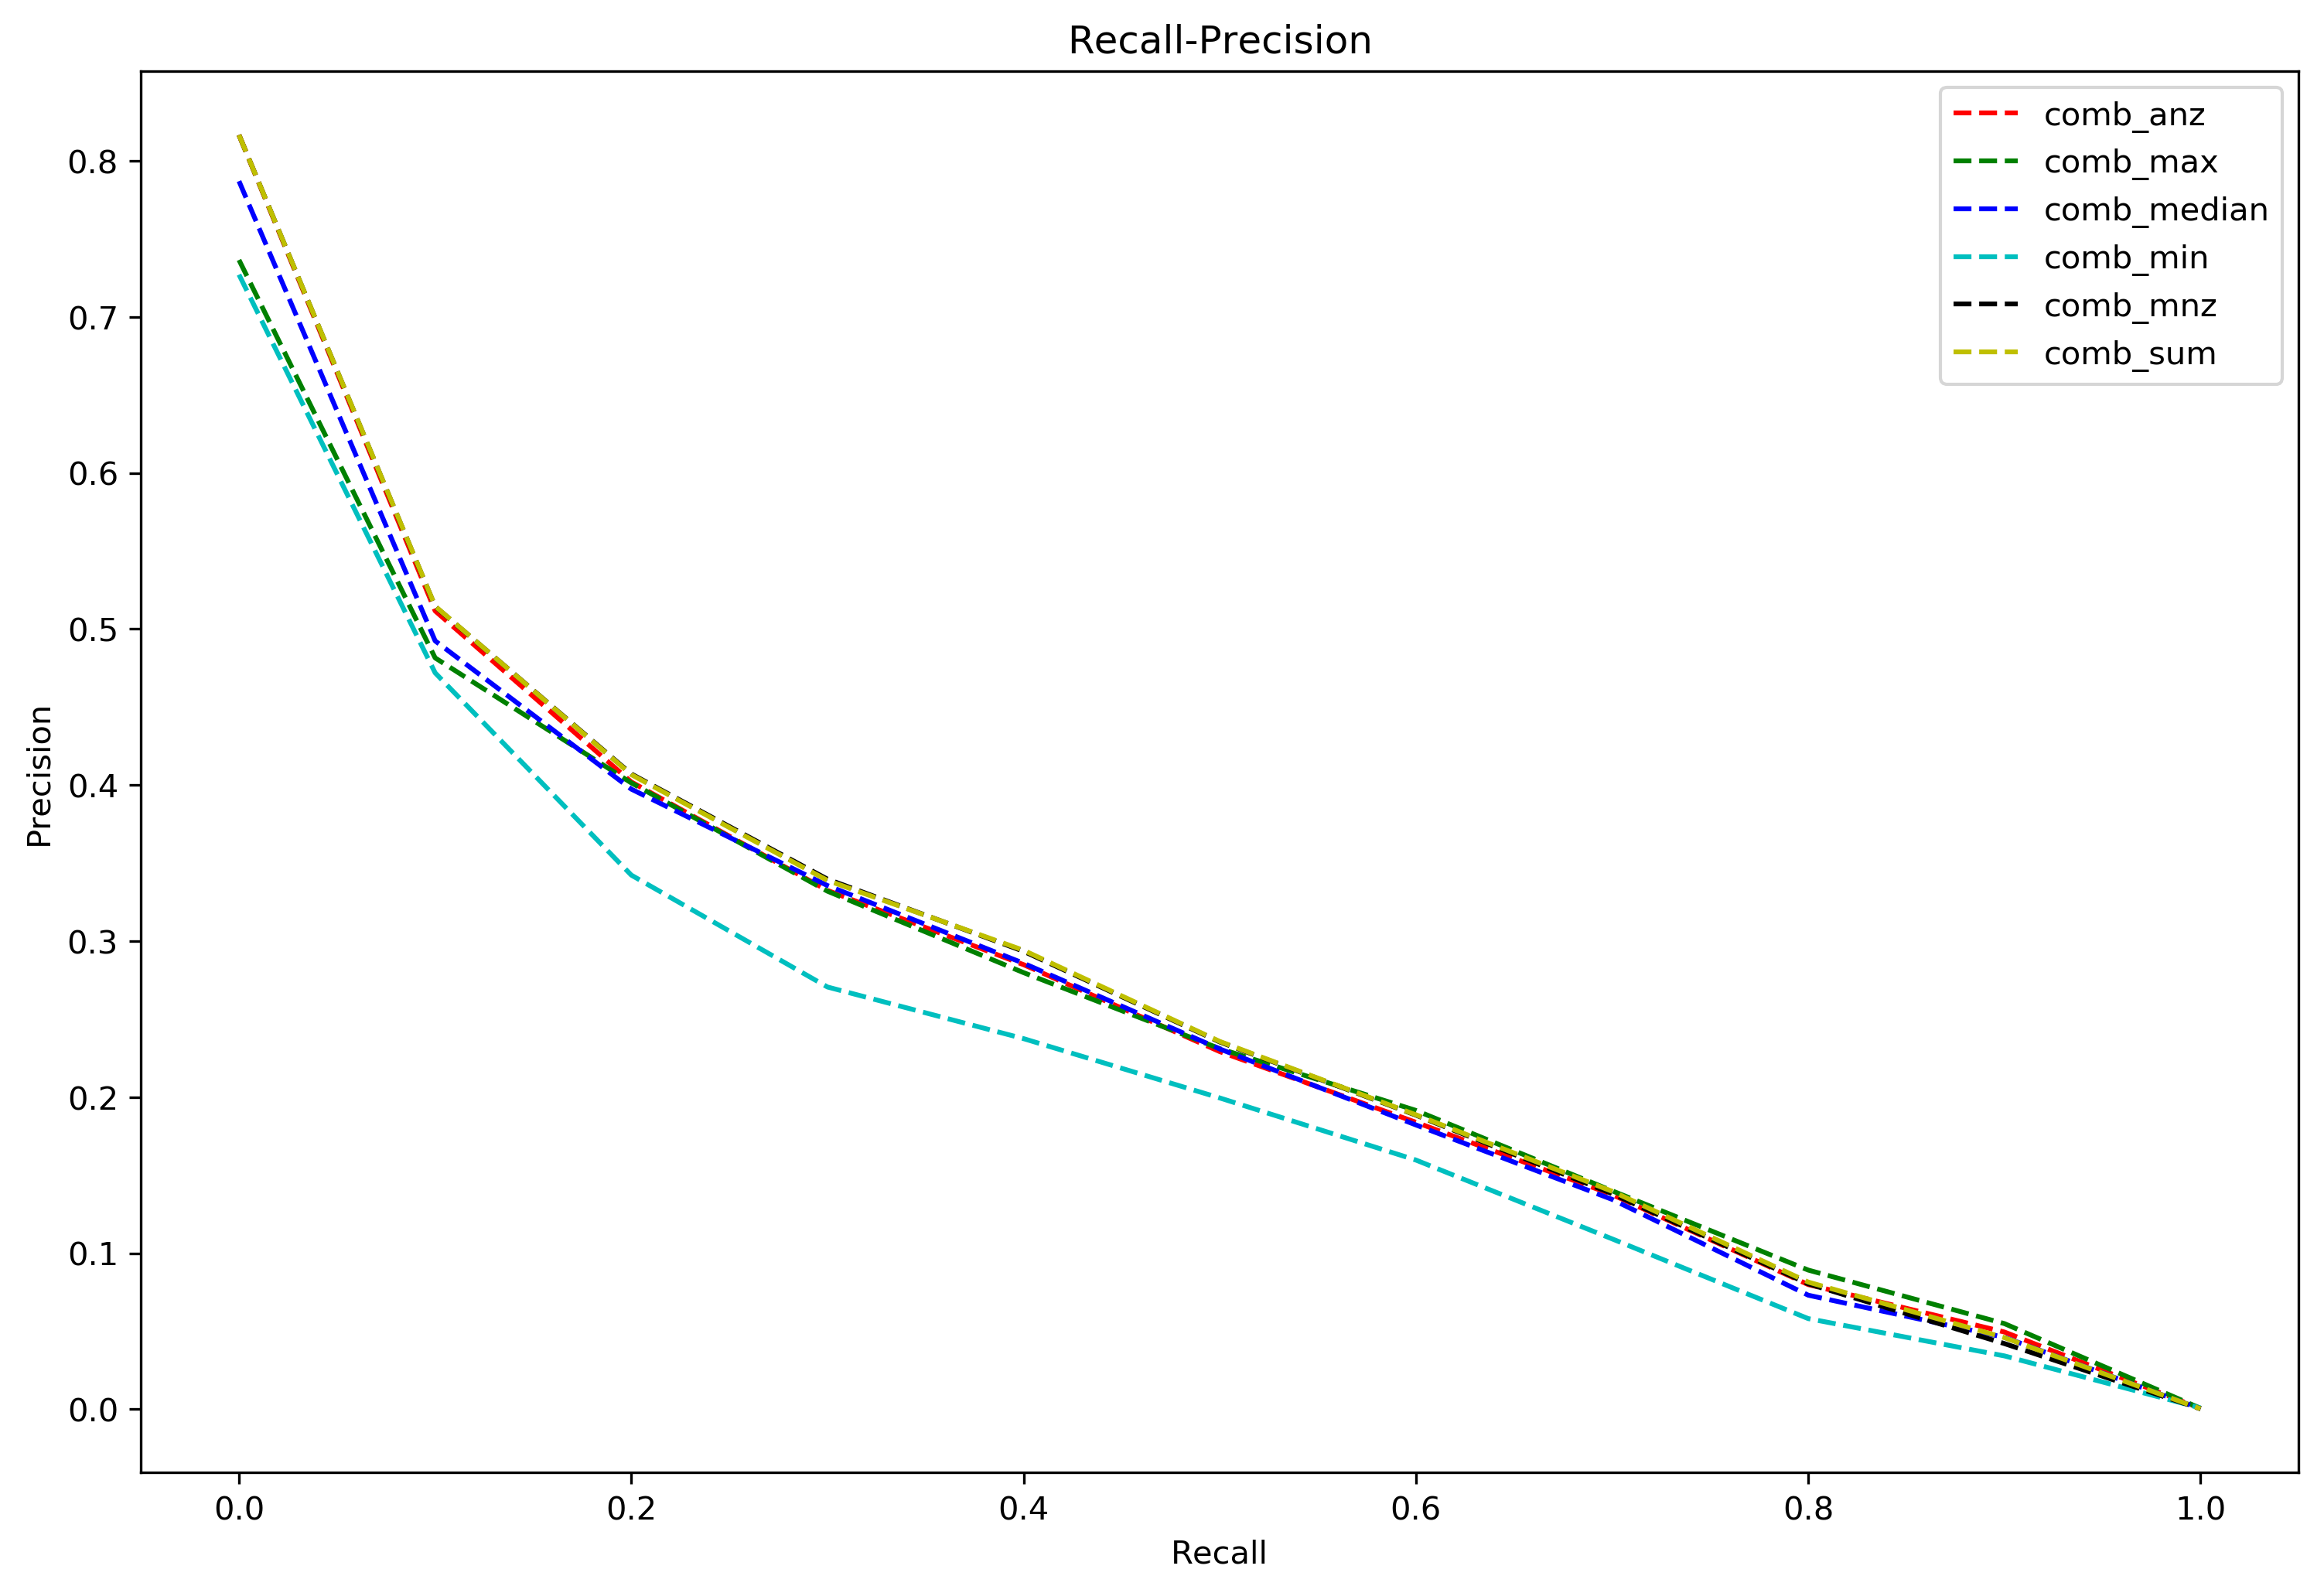

In [16]:
combList = "comb_anz.txt", "comb_max.txt", "comb_median.txt", "comb_min.txt", "comb_mnz.txt", "comb_sum.txt"
plot_PrecRec(pr, combList)

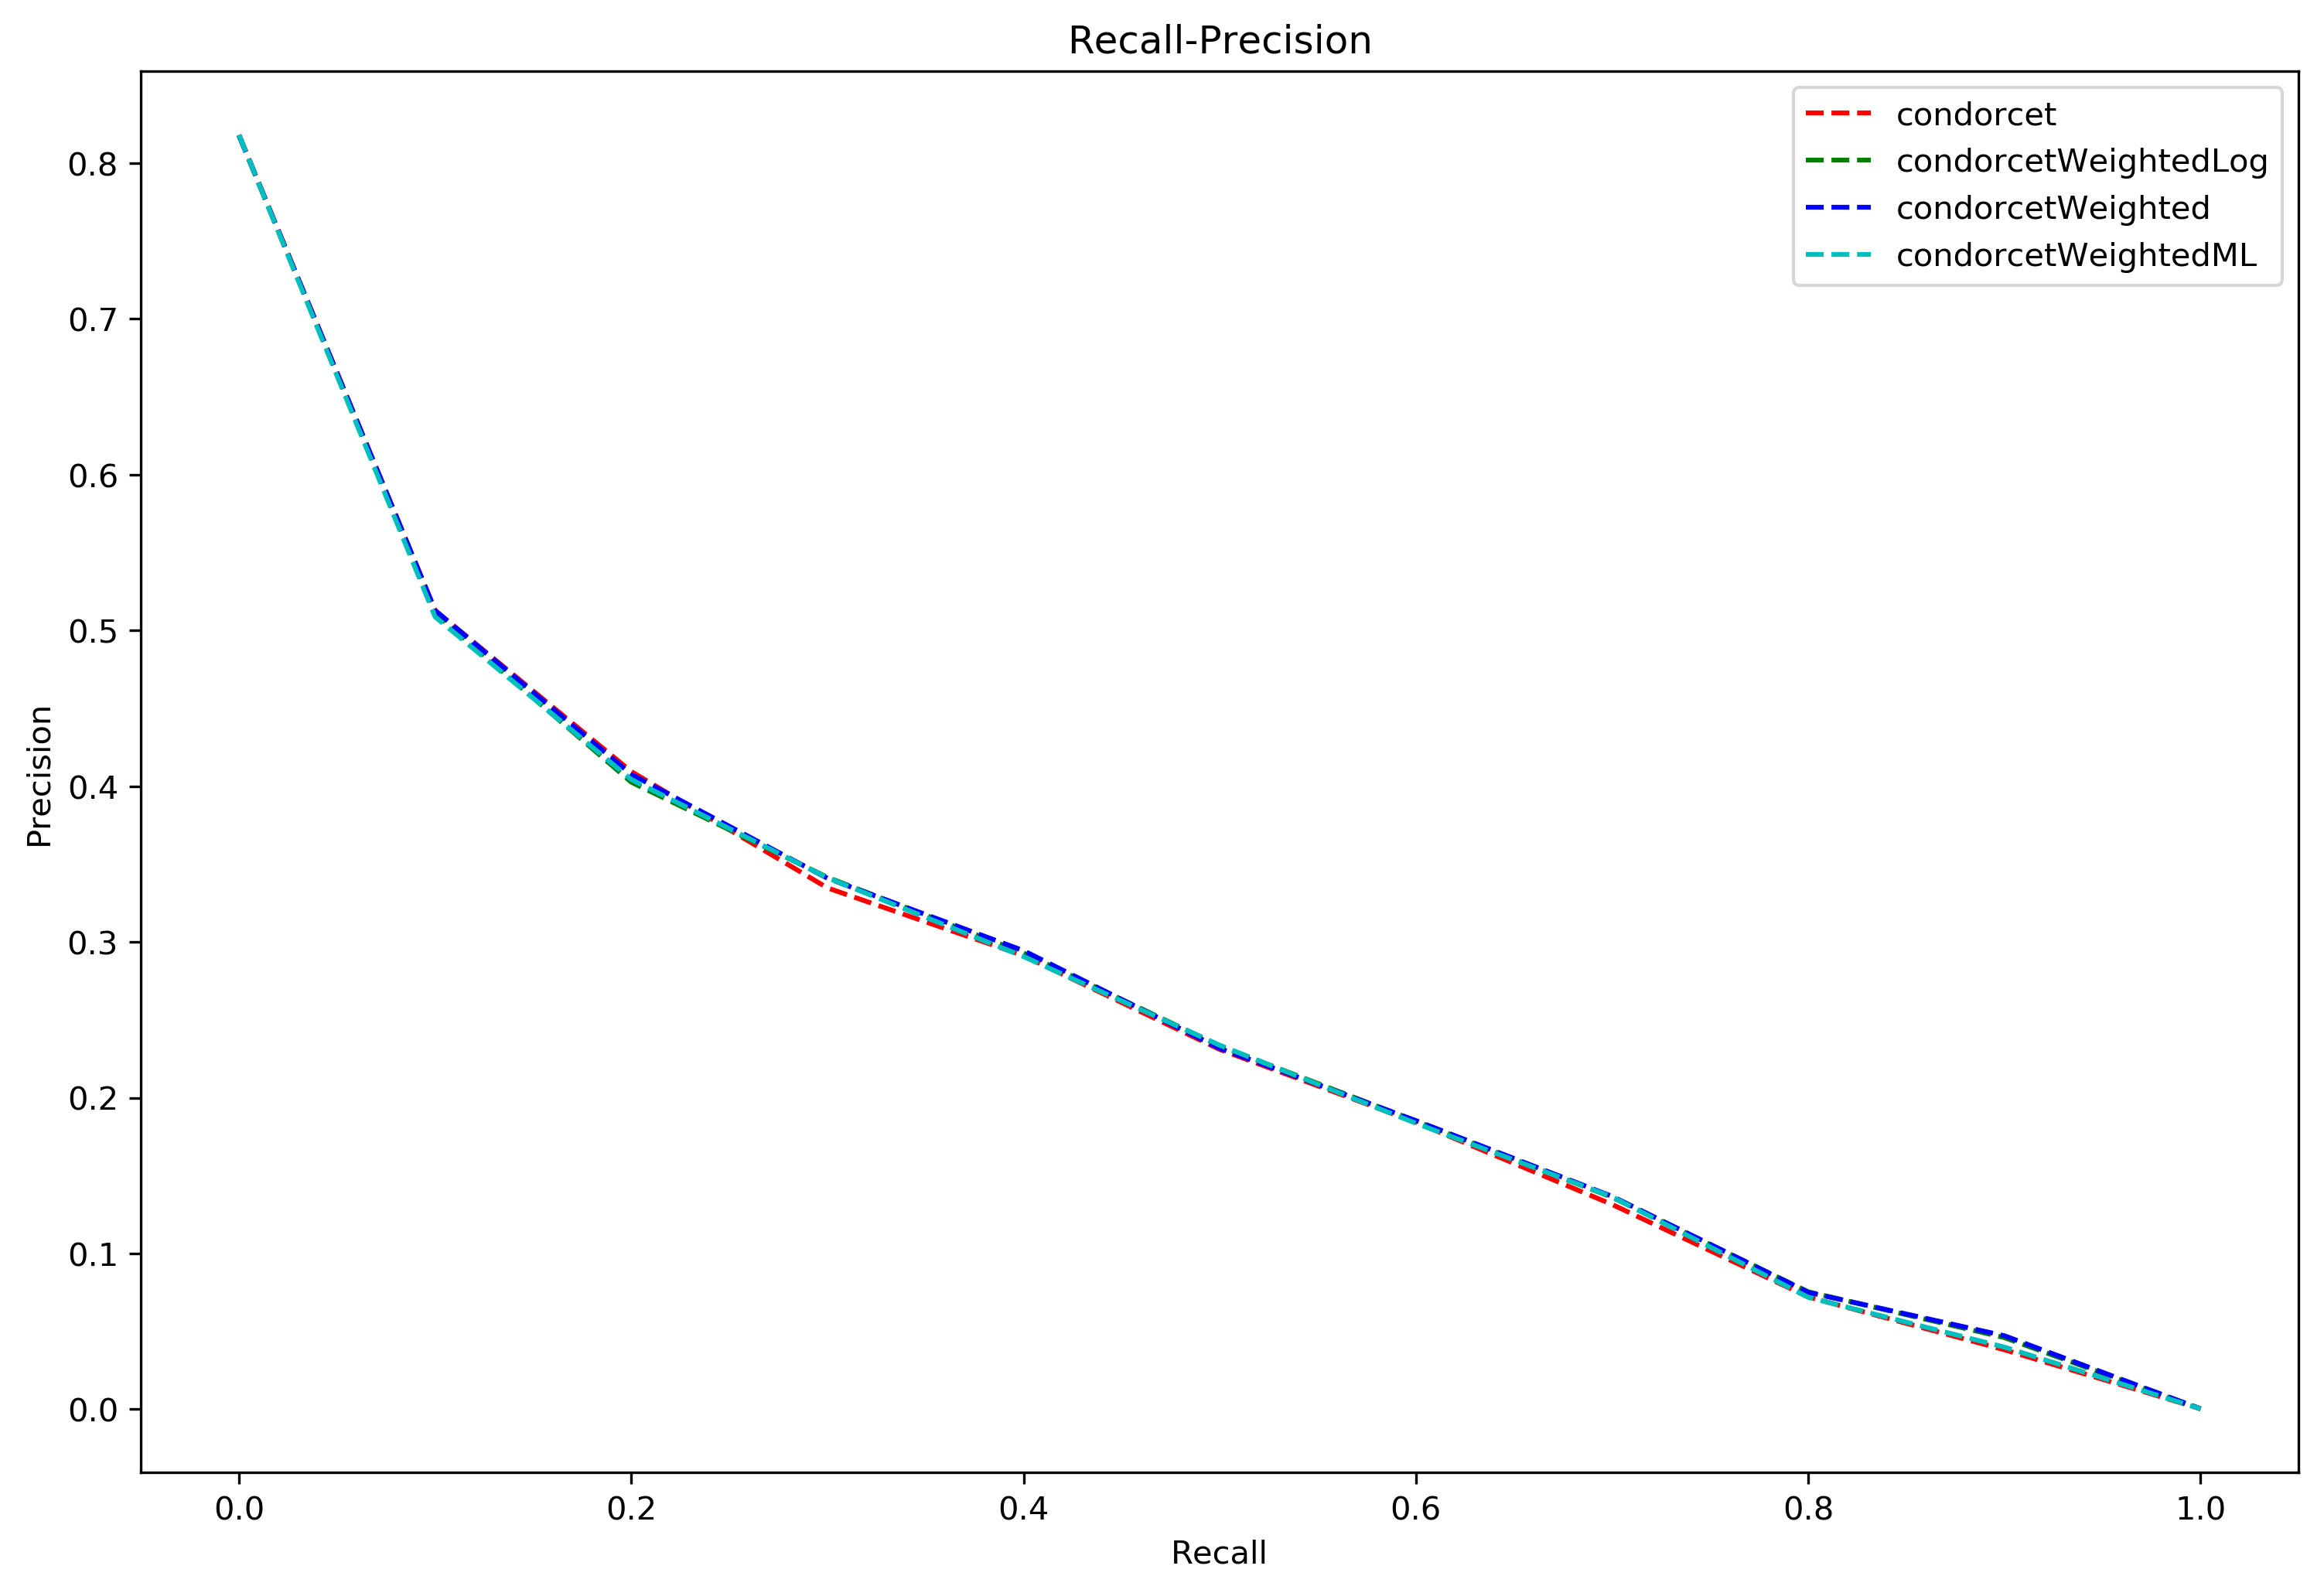

In [12]:
condList = "condorcet.txt", "condorcetWeightedLog.txt", "condorcetWeighted.txt", "condorcetWeightedML.txt"
plot_PrecRec(pr, condList)

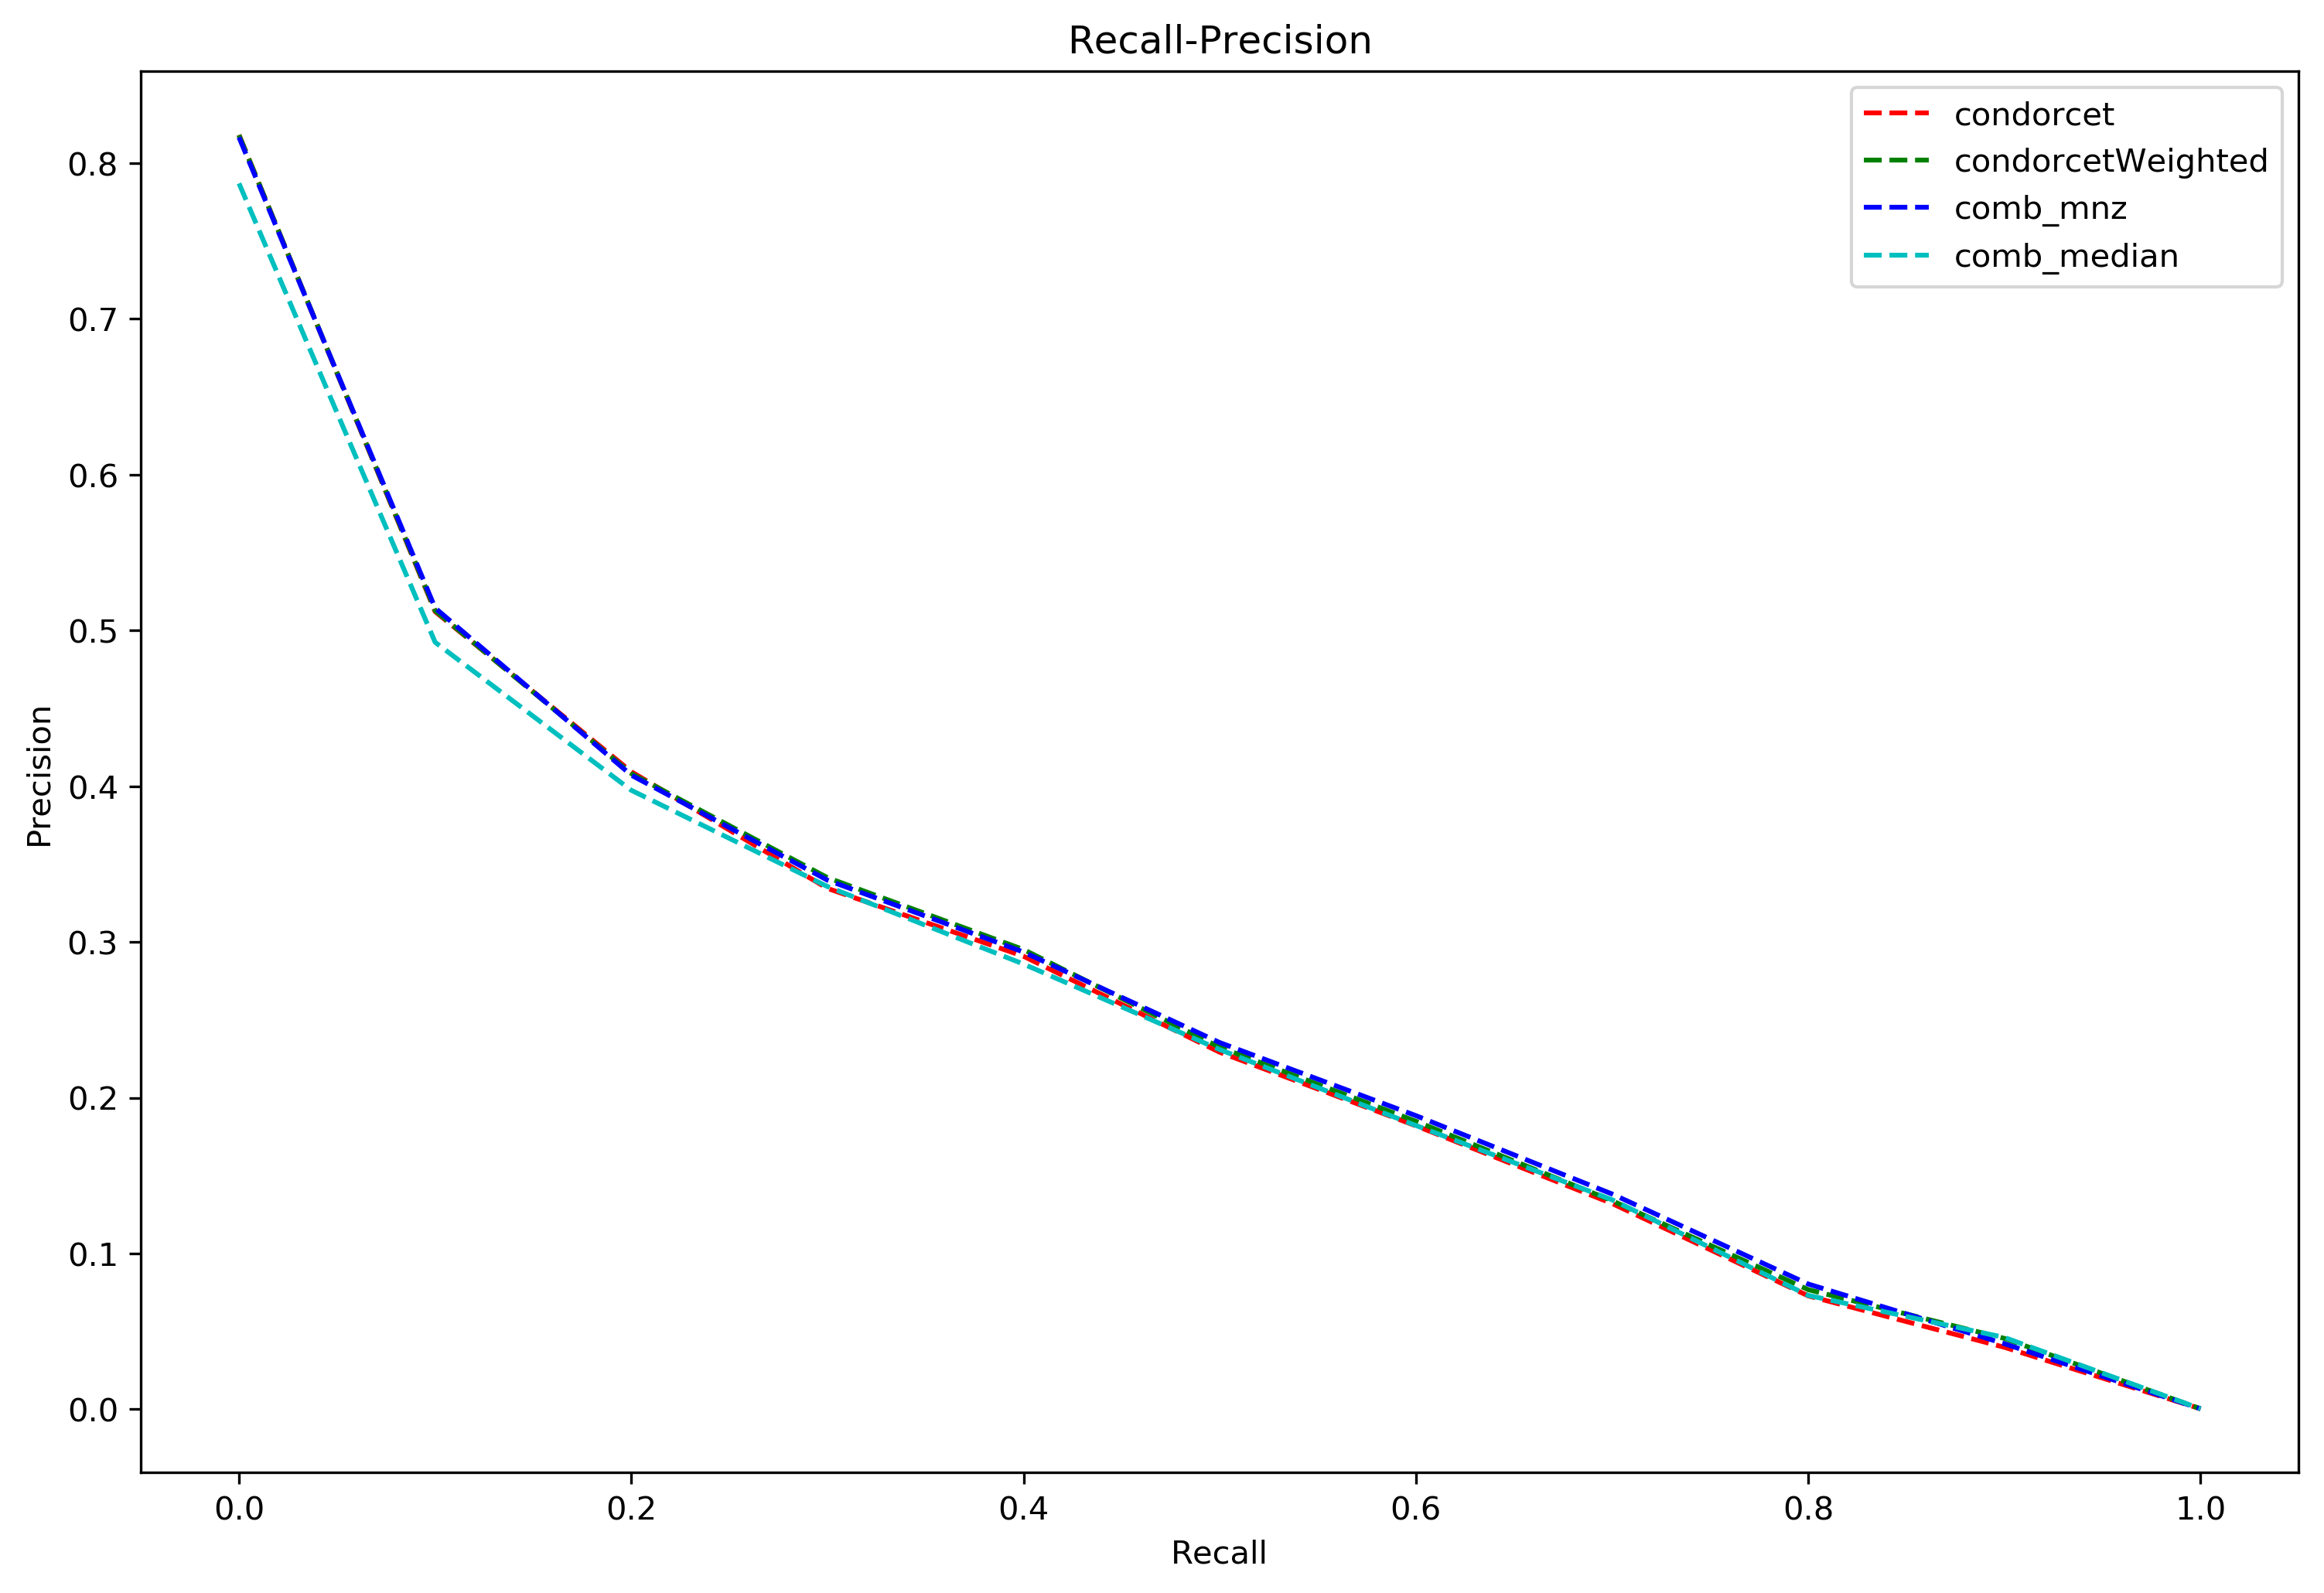

In [17]:
condcombList = "condorcet.txt", "condorcetWeighted.txt", "comb_mnz.txt", "comb_median.txt"
plot_PrecRec(pr, condcombList)